In [ ]:
#Density-based clustering locates regions of high density that are 
#separated from one another by regions of low density
#Density, in this context, is defined as the number of points within a specified radius.

In [8]:
# Notice: For visualization of map, you need basemap package.
# if you dont have basemap install on your machine, you can use the following line to install it
!pip install basemap==1.4.1 matplotlib==3.7.1
# Notice: you maight have to refresh your page and re-run the notebook after installation

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 33.7 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.0
    Uninstalling matplotlib-3.7.0:
      Successfully uninstalled matplotlib-3.7.0


In [22]:
#centroidLocation: Coordinates of the centroids that will generate the random data.
#numSamples: The number of data points we want generated, split over the number of centroids 
    #(# of centroids defined in centroidLocation)
#clusterDeviation: The standard deviation of the clusters. 
    #The larger the number, the further the spacing of the data points within the clusters.
    
def createDataPoints(centroidLocation, numSamples, clusterDeviation):
    # Create random data and store in feature matrix X and response vector y.
    X, y = make_blobs(n_samples=numSamples, centers=centroidLocation, 
                                cluster_std=clusterDeviation)
    
    # Standardize features by removing the mean and scaling to unit variance
    X = StandardScaler().fit_transform(X)
    return X, y   
    
display(X)   

array([[-1.08997984,  1.2445027 ],
       [ 1.03837634,  0.8527659 ],
       [-0.87341336,  1.08780552],
       ...,
       [ 0.7610229 , -1.5130992 ],
       [ 0.7967258 ,  0.29214503],
       [ 1.25025572,  0.90394657]])

In [23]:
#Use createDataPoints with the 3 inputs and store the output into variables X and y.
X, y = createDataPoints([[4,3], [2,-1], [-1,4]] , 1500, 0.5)

display(X)   
display(y)   

array([[ 0.92166057,  0.26573509],
       [ 1.13759585,  0.35549164],
       [-1.03813   ,  0.87270803],
       ...,
       [-1.0310035 ,  0.90218887],
       [ 0.27527525, -1.01053273],
       [ 0.03162439, -1.57334632]])

array([0, 0, 2, ..., 2, 1, 1])

In [24]:
#------DBSCAN stands for Density-Based Spatial Clustering of Applications with Noise. 
#it should be near to lots of other points in that cluster.

#It works based on two parameters: Epsilon and Minimum Points
#Epsilon determine a specified radius that if includes enough number of points within, we call it dense area
#minimumSamples determine the minimum number of data points we want in a neighborhood to define a cluster.

epsilon = 0.3
minimumSamples = 7
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(X)
labels = db.labels_
labels

array([0, 0, 1, ..., 1, 2, 2])

In [25]:
#Replace all elements with 'True' in core_samples_mask that are in the cluster, 
#'False' if the points are outliers.

# Firts, create an array of booleans using the labels from db.
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
core_samples_mask

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

# Remove repetition in labels by turning it into a set.
unique_labels = set(labels)
unique_labels

{-1, 0, 1, 2}

In [35]:
# Create colors for the clusters for as many labels as there are. 
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
display(unique_labels)

{-1, 0, 1, 2}

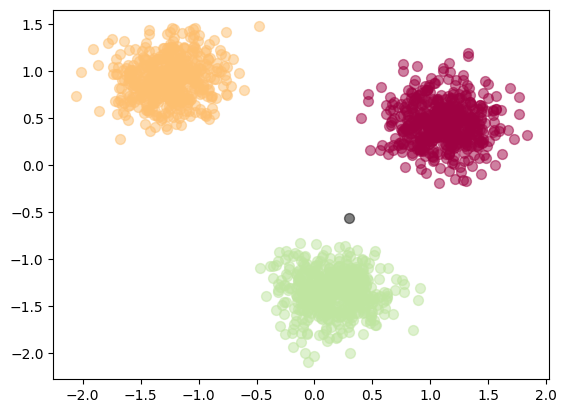

In [36]:
# Plot the points with colors
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    # Plot the datapoints that are clustered
    xy = X[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.5)

    # Plot the outliers
    xy = X[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.5)
    


In [37]:
#Recluster using K-means - another method

from sklearn.cluster import KMeans 

k_means3 = KMeans(init = "k-means++", n_clusters = 3, n_init = 12)
k_means3.fit(X)
k_means_labels1 = k_means3.labels_
display(k_means_labels1)
k_means_cluster_centers1 = k_means3.cluster_centers_
display(k_means_cluster_centers1)



array([2, 2, 1, ..., 1, 0, 0], dtype=int32)

array([[ 0.1569952 , -1.35184216],
       [-1.26043653,  0.90836669],
       [ 1.10344134,  0.44347547]])

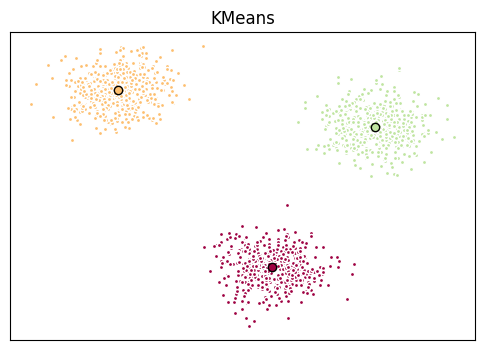

In [38]:
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1, 1, 1)

for k, col in zip(range(len(k_means3.cluster_centers_)), colors):

    # Create a list of all data points, where the data points that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels1 == k)
    
    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers1[k]
    
    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()

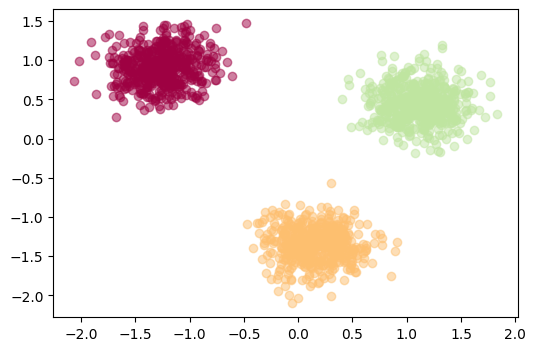

In [45]:
##The correct anwer:

from sklearn.cluster import KMeans 
k = 3
k_means3 = KMeans(init = "k-means++", n_clusters = k, n_init = 12)
k_means3.fit(X)
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(k), colors):
    my_members = (k_means3.labels_ == k)
    plt.scatter(X[my_members, 0], X[my_members, 1],  color=col, marker=u'o', alpha=0.5)
plt.show()
